In [128]:
!pip3 install opencv-python

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [131]:
img = image.load_img("/Users/ussie/Desktop/Injam/injam/Training/Small_Real/Image2.jpg")

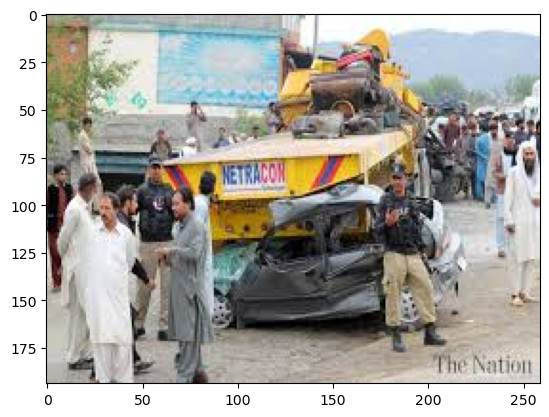

In [132]:
plt.imshow(img)

In [134]:
cv2.imread("/Users/ussie/Desktop/Injam/injam/Training/Small_Real/Image2.jpg").shape

(194, 259, 3)

In [135]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [136]:
train_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Training/", target_size = (200,200), batch_size = 3, class_mode = "binary")
validation_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Validation/", target_size = (200,200), batch_size = 3, class_mode = "binary")

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [137]:
train_dataset.class_indices

{'Small_Fake': 0, 'Small_Real': 1}

In [138]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [139]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3))
                                    ,tf.keras.layers.MaxPool2D(2,2),
                                    # increasing number of chanels
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')

])

In [140]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001), metrics=['accuracy'])


In [141]:
model_fit = model.fit(train_dataset, epochs=10)

Epoch 1/10


2023-08-03 08:49:13.589279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 67ms/step - loss: 6.1552 - accuracy: 0.4500
Epoch 2/10
7/7 [==============================] - 0s 33ms/step - loss: 0.5782 - accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 0s 31ms/step - loss: 0.7114 - accuracy: 0.5500
Epoch 4/10
7/7 [==============================] - 0s 31ms/step - loss: 0.8318 - accuracy: 0.8000
Epoch 5/10
7/7 [==============================] - 0s 31ms/step - loss: 0.1931 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 30ms/step - loss: 0.0557 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 29ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 29ms/step - loss: 0.7396 - accuracy: 0.7500
Epoch 9/10
7/7 [==============================] - 0s 29ms/step - loss: 0.0333 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 29ms/step - loss: 0.0091 - accuracy: 1.0000


1/1 [==============================] - 0s 13ms/step
Value is [[1.]]
1/1 [==============================] - 0s 9ms/step
Value is [[1.]]
1/1 [==============================] - 0s 8ms/step
Value is [[1.]]
1/1 [==============================] - 0s 8ms/step
Value is [[1.]]
1/1 [==============================] - 0s 9ms/step
Value is [[1.]]
1/1 [==============================] - 0s 8ms/step
Value is [[0.]]
1/1 [==============================] - 0s 8ms/step
Value is [[1.]]
1/1 [==============================] - 0s 9ms/step
Value is [[1.]]
1/1 [==============================] - 0s 8ms/step
Value is [[1.]]
1/1 [==============================] - 0s 11ms/step
Value is [[1.]]


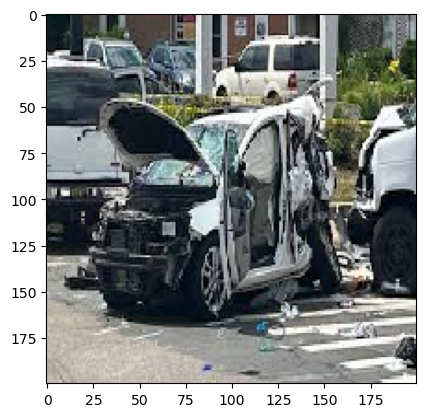

In [146]:
dir_path = "/Users/ussie/Desktop/Injam/injam/Test/Small_Real"
for i in os.listdir(dir_path):
    if i != ".DS_Store":
        img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
        plt.imshow(img)
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        predict = np.round(val) 
        print("Value is", predict)